In [96]:
import pandas as pd
import scipy.stats
import pylab
import matplotlib.pyplot as plt
import numpy as np
#!pip install statsmodels
import statsmodels.tsa.stattools as tst
from statsmodels.tsa.seasonal import seasonal_decompose

In [97]:
data = pd.read_csv("eurcad_d.csv")
data.head(10)

,Date,Open,High,Low,Close
0,1971-01-04,0.5411,0.5411,0.5411,0.5411
1,1971-01-05,0.5405,0.5405,0.5405,0.5405
2,1971-01-06,0.5409,0.5409,0.5409,0.5409
3,1971-01-07,0.5432,0.5432,0.5432,0.5432
4,1971-01-08,0.5436,0.5436,0.5436,0.5436
5,1971-01-11,0.5441,0.5441,0.5441,0.5441
6,1971-01-12,0.5425,0.5425,0.5425,0.5425
7,1971-01-13,0.5423,0.5423,0.5423,0.5423
8,1971-01-14,0.5431,0.5431,0.5431,0.5431
9,1971-01-15,0.5433,0.5433,0.5433,0.5433


In [99]:
data.tail(10)

,Date,Open,High,Low,Close
12992,2021-12-15,1.44798,1.45484,1.44675,1.44965
12993,2021-12-16,1.44966,1.45207,1.44196,1.44751
12994,2021-12-17,1.44754,1.45360,1.44475,1.44892
12995,2021-12-20,1.44812,1.46457,1.44777,1.45968
12996,2021-12-21,1.45967,1.46290,1.45562,1.45701
12997,2021-12-22,1.45701,1.46134,1.45360,1.45449
12998,2021-12-23,1.45449,1.45750,1.44826,1.45112
12999,2021-12-24,1.45110,1.45510,1.44820,1.44948
13000,2021-12-27,1.44930,1.45361,1.44635,1.44818
13001,2021-12-28,1.44812,1.45128,1.44556,1.44919


In [100]:
print(data)
data.describe()

             Date     Open     High      Low    Close
0      1971-01-04  0.54110  0.54110  0.54110  0.54110
1      1971-01-05  0.54050  0.54050  0.54050  0.54050
2      1971-01-06  0.54090  0.54090  0.54090  0.54090
3      1971-01-07  0.54320  0.54320  0.54320  0.54320
4      1971-01-08  0.54360  0.54360  0.54360  0.54360
...           ...      ...      ...      ...      ...
12997  2021-12-22  1.45701  1.46134  1.45360  1.45449
12998  2021-12-23  1.45449  1.45750  1.44826  1.45112
12999  2021-12-24  1.45110  1.45510  1.44820  1.44948
13000  2021-12-27  1.44930  1.45361  1.44635  1.44818
13001  2021-12-28  1.44812  1.45128  1.44556  1.44919

[13002 rows x 5 columns]


,Open,High,Low,Close
count,13002.000000,13002.000000,13002.000000,13002.000000
mean,1.311246,1.313962,1.308587,1.311257
std,0.305617,0.307142,0.304157,0.305614
min,0.538800,0.538800,0.538800,0.538800
25%,1.169450,1.169450,1.169450,1.169450
50%,1.407370,1.411250,1.403500,1.407500
75%,1.527300,1.531700,1.522500,1.527400
max,1.895800,1.895800,1.895800,1.895800


In [101]:
data.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [102]:
data.Date.describe()

count          13002
unique         13002
top       1971-01-04
freq               1
Name: Date, dtype: object

In [103]:
data.Date = pd.to_datetime(data.Date,dayfirst = True)
data.set_index('Date',inplace = True)

In [104]:
data

,Open,High,Low,Close
Date,,,,
1971-01-04,0.54110,0.54110,0.54110,0.54110
1971-01-05,0.54050,0.54050,0.54050,0.54050
1971-01-06,0.54090,0.54090,0.54090,0.54090
1971-01-07,0.54320,0.54320,0.54320,0.54320
1971-01-08,0.54360,0.54360,0.54360,0.54360
...,...,...,...,...
2021-12-22,1.45701,1.46134,1.45360,1.45449
2021-12-23,1.45449,1.45750,1.44826,1.45112
2021-12-24,1.45110,1.45510,1.44820,1.44948


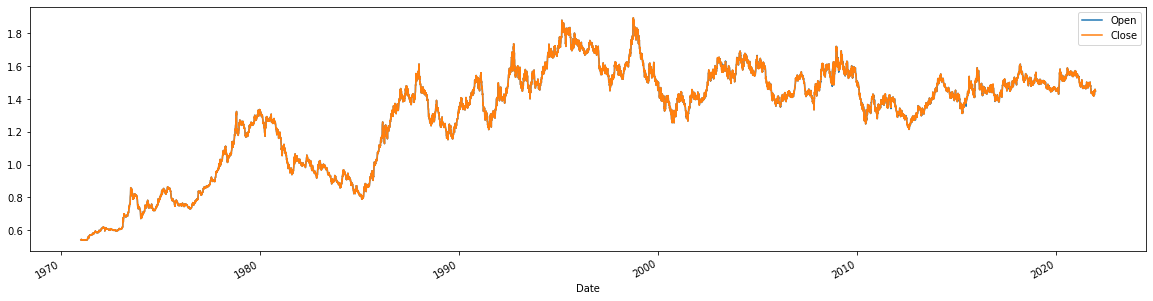

In [105]:
data.Open.plot(figsize = (20,5))
data.Close.plot(figsize = (20,5))
plt.legend()
plt.show()

In [106]:
data['Mean'] = (data.Open + data.Close) /2 
data.tail()

,Open,High,Low,Close,Mean
Date,,,,,
2021-12-22,1.45701,1.46134,1.45360,1.45449,1.455750
2021-12-23,1.45449,1.45750,1.44826,1.45112,1.452805
2021-12-24,1.45110,1.45510,1.44820,1.44948,1.450290
2021-12-27,1.44930,1.45361,1.44635,1.44818,1.448740
2021-12-28,1.44812,1.45128,1.44556,1.44919,1.448655


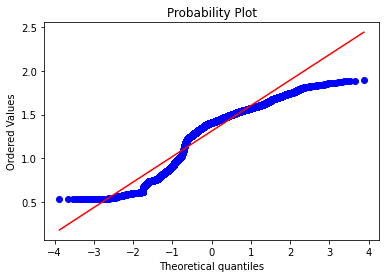

In [107]:
scipy.stats.probplot(data.Open, plot = pylab)
pylab.show()

In [108]:
data = data.asfreq("b")

In [109]:
data.head(15)

,Open,High,Low,Close,Mean
Date,,,,,
1971-01-04,0.5411,0.5411,0.5411,0.5411,0.5411
1971-01-05,0.5405,0.5405,0.5405,0.5405,0.5405
1971-01-06,0.5409,0.5409,0.5409,0.5409,0.5409
1971-01-07,0.5432,0.5432,0.5432,0.5432,0.5432
1971-01-08,0.5436,0.5436,0.5436,0.5436,0.5436
1971-01-11,0.5441,0.5441,0.5441,0.5441,0.5441
1971-01-12,0.5425,0.5425,0.5425,0.5425,0.5425
1971-01-13,0.5423,0.5423,0.5423,0.5423,0.5423
1971-01-14,0.5431,0.5431,0.5431,0.5431,0.5431


In [110]:
data.isna().sum()

Open     300
High     300
Low      300
Close    300
Mean     300
dtype: int64

In [111]:
data = data.fillna(method = 'ffill')

In [112]:
data.isna().sum()

Open     0
High     0
Low      0
Close    0
Mean     0
dtype: int64

In [113]:
print(data)

               Open     High      Low    Close      Mean
Date                                                    
1971-01-04  0.54110  0.54110  0.54110  0.54110  0.541100
1971-01-05  0.54050  0.54050  0.54050  0.54050  0.540500
1971-01-06  0.54090  0.54090  0.54090  0.54090  0.540900
1971-01-07  0.54320  0.54320  0.54320  0.54320  0.543200
1971-01-08  0.54360  0.54360  0.54360  0.54360  0.543600
...             ...      ...      ...      ...       ...
2021-12-22  1.45701  1.46134  1.45360  1.45449  1.455750
2021-12-23  1.45449  1.45750  1.44826  1.45112  1.452805
2021-12-24  1.45110  1.45510  1.44820  1.44948  1.450290
2021-12-27  1.44930  1.45361  1.44635  1.44818  1.448740
2021-12-28  1.44812  1.45128  1.44556  1.44919  1.448655

[13302 rows x 5 columns]


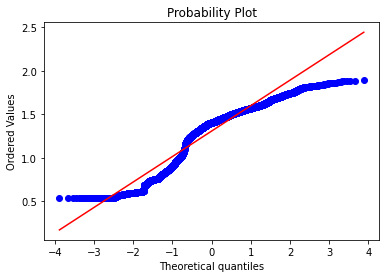

In [114]:
scipy.stats.probplot(data.Open, plot = pylab)
pylab.show()

In [115]:
data.describe()

,Open,High,Low,Close,Mean
count,13302.000000,13302.000000,13302.000000,13302.000000,13302.000000
mean,1.308626,1.311297,1.306007,1.308633,1.308630
std,0.307173,0.308690,0.305717,0.307168,0.307158
min,0.538800,0.538800,0.538800,0.538800,0.538800
25%,1.150775,1.150775,1.150775,1.150775,1.150775
50%,1.406250,1.410030,1.402100,1.406400,1.406250
75%,1.526745,1.531300,1.522300,1.526892,1.526587
max,1.895800,1.895800,1.895800,1.895800,1.895800


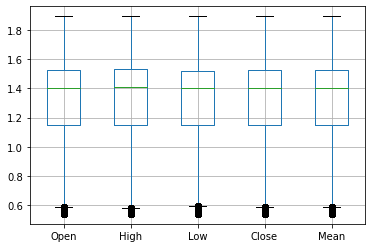

In [116]:
boxplot = data.boxplot(column=['Open', 'High', 'Low', 'Close','Mean'])

In [117]:
data_train_size = int(len(data)*.8)

In [118]:
data_train = data.iloc[:data_train_size]

In [119]:
data_test = data.iloc[data_train_size:]

In [120]:
data_train.tail()

,Open,High,Low,Close,Mean
Date,,,,,
2011-10-11,1.4002,1.4082,1.3976,1.4040,1.40210
2011-10-12,1.4038,1.4082,1.3973,1.4025,1.40315
2011-10-13,1.4031,1.4076,1.4006,1.4061,1.40460
2011-10-14,1.4061,1.4076,1.3967,1.4016,1.40385
2011-10-17,1.4026,1.4070,1.3921,1.4058,1.40420


In [121]:
data_test.head()

,Open,High,Low,Close,Mean
Date,,,,,
2011-10-18,1.4056,1.4086,1.3926,1.3942,1.39990
2011-10-19,1.3945,1.4042,1.3932,1.4024,1.39845
2011-10-20,1.4022,1.4048,1.3936,1.4001,1.40115
2011-10-21,1.3999,1.4024,1.3939,1.3987,1.39930
2011-10-24,1.4005,1.4026,1.3912,1.3986,1.39955


In [123]:
wn = np.random.normal(loc = data_train.Mean.mean(), scale = data_train.Mean.std(), size = len(data_train))

In [124]:
data_train['WN'] = wn

C:\Users\Marzieh\AppData\Local\Temp/ipykernel_9660/406749862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['WN'] = wn


In [125]:
data_train.describe()

,Open,High,Low,Close,Mean,WN
count,10641.000000,10641.000000,10641.000000,10641.000000,10641.000000,10641.000000
mean,1.273708,1.275645,1.271791,1.273717,1.273713,1.272598
std,0.331994,0.333345,0.330696,0.331992,0.331984,0.327623
min,0.538800,0.538800,0.538800,0.538800,0.538800,0.055069
25%,0.992700,0.992700,0.992700,0.992700,0.992700,1.053674
50%,1.371800,1.375400,1.368700,1.371900,1.372100,1.275155
75%,1.541500,1.545000,1.537800,1.541500,1.541850,1.492995
max,1.895800,1.895800,1.895800,1.895800,1.895800,2.493774


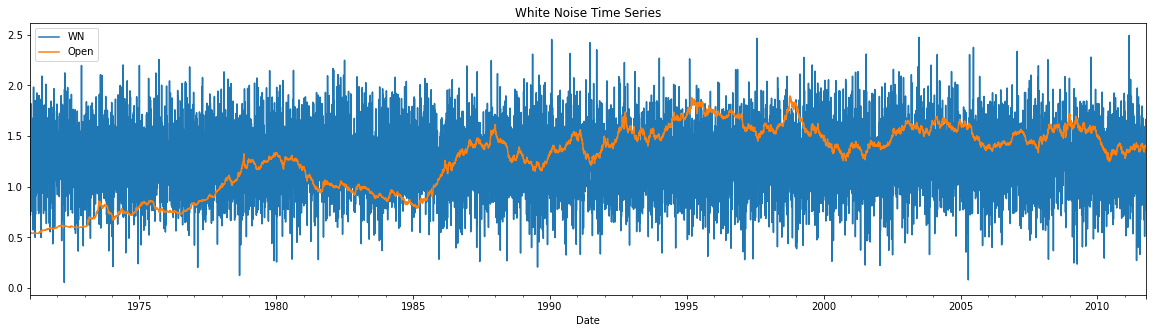

In [130]:
data_train.WN.plot(title = 'White Noise Time Series', figsize = (20,5))
data_train.Open.plot(figsize = (20,5))
plt.legend()
plt.show()

In [136]:
tst.adfuller(data_train.Open)

(-2.2407883943444435,
 0.19177594133345433,
 1,
 10639,
 {'1%': -3.4309648020003425,
  '5%': -2.8618117077096987,
  '10%': -2.5669146248734442},
 -70409.49511974494)

In [137]:
tst.adfuller(data_train.Mean)

(-2.2449896524430915,
 0.1903236764832571,
 10,
 10630,
 {'1%': -3.430965322654626,
  '5%': -2.8618119377856095,
  '10%': -2.566914747342626},
 -72331.56655571659)

In [138]:
tst.adfuller(data_train.WN)

(-101.1613864174445,
 0.0,
 0,
 10640,
 {'1%': -3.43096474420425,
  '5%': -2.861811682169738,
  '10%': -2.566914611278549},
 6416.391506882781)

In [143]:
season_decom_add = seasonal_decompose(data_train.Mean, model = "additive")

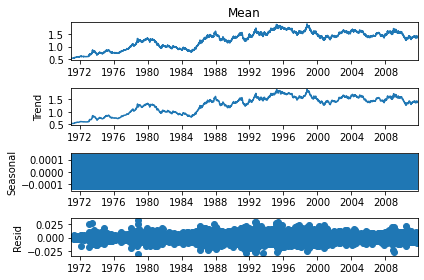

<Figure size 1440x360 with 0 Axes>

In [149]:
season_decom_add.plot()
plt.show()

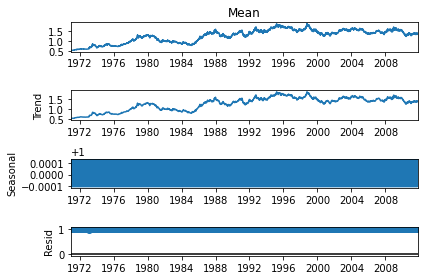

In [150]:
season_decom_mul = seasonal_decompose(data_train.Mean, model = "multiplicative")
season_decom_mul.plot()
plt.show()